# MAKİNE ÖĞRENMESİ FİNAL

Yavuz Selim Güner

20040101026

Gereksiz uyarılar gelmesin diye uyguladım.

In [103]:
import warnings

warnings.filterwarnings('ignore')

**Veri Setinin Yüklenmesi ve Ön İşleme**

Öncelikle veri setini yükleyelim ve tanımlayalım.

In [104]:
import pandas as pd

In [105]:
data = pd.read_csv("./veri-seti.txt", sep="\s+", header=None)
columnHeads = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data.columns = columnHeads
print(f'Row - Column {data.shape}')
data.head()

Row - Column (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Veriyi Eğitim ve Test Setlerine Ayırma ve Normalizasyon Uygulama**

Veriyi %70 eğitim ve %30 test setlerine bölelim ve normalizasyon uygulayalım.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X ve y değişkenlerini tanımlama
X = data.drop(columns="Outcome")
y = data["Outcome"]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizasyon uygulama
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Naive Bayes Sınıflandırıcısını Uygulama**

Naive Bayes modelini eğitelim ve test seti üzerinde tahminler yapalım.

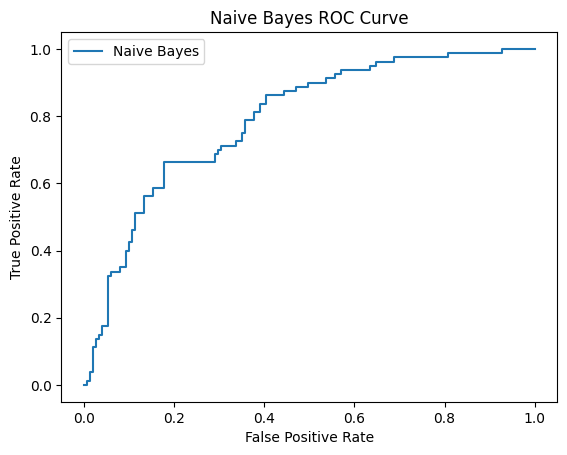

Naive Bayes
Confusion Matrix:
[[119  32]
 [ 27  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

ROC AUC Score: 0.7904801324503311


In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Naive Bayes modelini oluşturma
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_nb = nb_model.predict(X_test)

# Konfüzyon Matrisi ve Classification Report
cm_nb = confusion_matrix(y_test, y_pred_nb)
cr_nb = classification_report(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.legend()
plt.show()

# Özet Sonuçlar
print("Naive Bayes")
print("Confusion Matrix:")
print(cm_nb)
print("Classification Report:")
print(cr_nb)
print(f"ROC AUC Score: {roc_auc_nb}")

Karmaşıklık Matrisi (Confusion Matrix):
119 doğru negatif ve 53 doğru pozitif sınıfı doğru bir şekilde tahmin edildi.
32 yanlış pozitif ve 27 yanlış negatif sınıfı yanlış tahmin edildi.
Modelin sınıfları ne kadar iyi ayırt ettiğini gösterir.
Sınıflandırma Raporu (Classification Report):
Sınıf ‘0’ için hassasiyet (precision) yüksek (0.82), yani ‘0’ sınıfını tahmin ettiğinde genellikle doğru.
Sınıf ‘1’ için geri çağırma (recall) da nispeten yüksek (0.66), yani ‘1’ sınıfının tüm ilgili örneklerini tanımlamada iyi.
F1 puanı, hassasiyet ve geri çağırmanın birleşimidir; burada ‘0’ sınıfı için 0.80 ve ‘1’ sınıfı için 0.64 dengeli F1 puanları görüyoruz.
Genel doğruluk (accuracy) %74, yani Naive Bayes’in genel olarak yaptığı tahminlerin bu yüzdesi doğru.
ROC Eğrisi ve AUC Puanı:
ROC eğrisi, duyarlılık (TPR) ve özgüllük (1 - FPR) arasındaki ticaret-off’u gösterir. Eğri, alt sol köşeden başlar ve üst sol köşeye doğru hareket eder.
AUC (Alan Altında Eğri), sınıflandırıcının iki sınıf arasında ne kadar iyi ayırt edebildiğini ölçer. Burada verilen metne göre AUC puanı 0.79, bu da sınıflandırıcının iyi bir ayrım yeteneğine sahip olduğunu gösterir.
Sonuç olarak, Naive Bayes bu veri kümesinde iyi bir performans sergilemiş gibi görünüyor, ancak yanlış pozitif ve yanlış negatifleri azaltmak için iyileştirmeler yapılabilir. Genel olarak, bu sonuçlar, sınıflar arasındaki ayrım yeteneği ve makro/ponderasyonlu ortalama açısından tutarlı bir performans gösterdiğini gösteriyor.

**K-Nearest Neighbors (KNN) Sınıflandırıcısını Uygulama ve En İyi k Değerini Belirleme**

Cross-validation kullanarak en iyi k değerini belirleyelim.

En iyi k değeri: 7


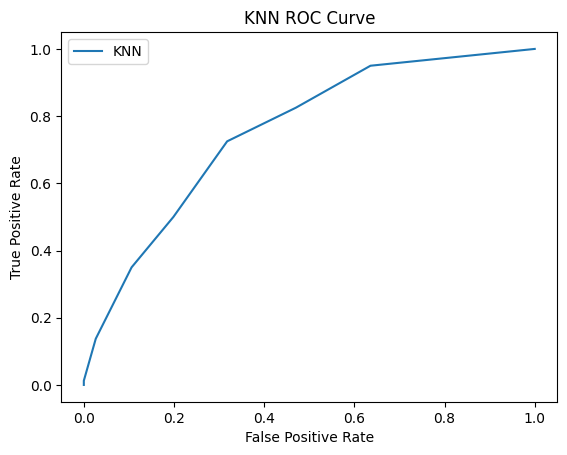

K-Nearest Neighbors (KNN)
Confusion Matrix:
[[121  30]
 [ 40  40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.57      0.50      0.53        80

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231

ROC AUC Score: 0.753890728476821


In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN modeli ve parametre aralığı
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 31))}

# GridSearchCV ile en iyi k değerini belirleme
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi k değeri
best_k = grid_search.best_params_['n_neighbors']
print(f"En iyi k değeri: {best_k}")

# En iyi k değeri ile KNN modelini oluşturma
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_knn = best_knn.predict(X_test)

# Konfüzyon Matrisi ve Classification Report
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend()
plt.show()

# Özet Sonuçlar
print("K-Nearest Neighbors (KNN)")
print("Confusion Matrix:")
print(cm_knn)
print("Classification Report:")
print(cr_knn)
print(f"ROC AUC Score: {roc_auc_knn}")

Karmaşıklık Matrisi (Confusion Matrix):
151 örneği olan sınıf ‘0’ için 121 doğru negatif ve 40 doğru pozitif sınıfı doğru bir şekilde tahmin edildi.
80 örneği olan sınıf ‘1’ için 30 yanlış pozitif ve 40 yanlış negatif sınıfı yanlış tahmin edildi.
Modelin sınıfları ne kadar iyi ayırt ettiğini gösterir.
Sınıflandırma Raporu (Classification Report):
Sınıf ‘0’ için hassasiyet (precision) 0.75 ve geri çağırma (recall) 0.80, bu da 0.78 F1 puanına yol açtı.
Sınıf ‘1’ için hassasiyet daha düşük (0.57), geri çağırma ise 0.50 ve F1 puanı 0.53.
Genel doğruluk (accuracy) %70, makro ortalama ve ağırlıklı ortalama hassasiyet, geri çağırma ve F1 puanlarında %60’ların ortasından %70’e kadar bir aralıkta.
ROC Eğrisi ve AUC Puanı:
ROC eğrisi, duyarlılık (TPR) ve özgüllük (1 - FPR) arasındaki ticaret-off’u gösterir. Eğri, alt sol köşeden başlar ve üst sağ köşeye doğru hareket eder.
Verilen metne göre ROC AUC Puanı yaklaşık 0.754, bu da ortalama bir ayrım yeteneği olduğunu gösterir; bir’e yakın değerler mükemmel model performansını, yarıya yakın değerler ise rastgele şansa göre bir performansı işaret eder.
Özetle, bu KNN sınıflandırıcısı, iki sınıfı sınıflandırmada makul bir performans gösteriyor ve ‘0’ sınıfının örneklerini ‘1’ sınıfının örneklerinden daha iyi ayırt edebiliyor gibi görünüyor. ROC eğrisi de pozitif ve negatif sınıfları ayırt etme yeteneğini orta düzeyde destekliyor.

**Multi-Layer Perceptron (MLP) Sınıflandırıcısını Uygulama**

MLP modelini oluşturup eğitelim ve test seti üzerinde tahminler yapalım.

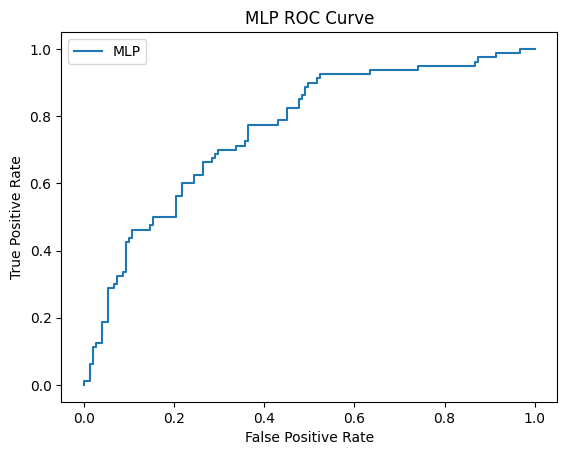

Multi-Layer Perceptron (MLP)
Confusion Matrix:
[[120  31]
 [ 38  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.58      0.53      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231

ROC AUC Score: 0.7597682119205298


In [109]:
from sklearn.neural_network import MLPClassifier

# MLP modelini oluşturma
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_mlp = mlp.predict(X_test)

# Konfüzyon Matrisi ve Classification Report
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cr_mlp = classification_report(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])

# ROC Curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label="MLP")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP ROC Curve")
plt.legend()
plt.show()

# Özet Sonuçlar
print("Multi-Layer Perceptron (MLP)")
print("Confusion Matrix:")
print(cm_mlp)
print("Classification Report:")
print(cr_mlp)
print(f"ROC AUC Score: {roc_auc_mlp}")

Karmaşıklık Matrisi (Confusion Matrix):
231 örneğin 120’si sınıf ‘0’ olarak doğru tahmin edildi (doğru negatifler).
31’i sınıf ‘0’ olarak yanlış tahmin edildi (yanlış negatifler).
38’i sınıf ‘1’ olarak yanlış tahmin edildi (yanlış pozitifler).
42’si sınıf ‘1’ olarak doğru tahmin edildi (doğru pozitifler).
Modelin sınıfları ne kadar iyi ayırt ettiğini gösterir.
Sınıflandırma Raporu (Classification Report):
Sınıf ‘0’ için hassasiyet (precision) sınıf '1’den daha yüksektir, bu da bir örneği sınıf ‘0’ olarak tahmin ettiğinde daha doğru olma eğiliminde olduğunu gösterir.
Her iki sınıf için geri çağırma (recall) benzerdir, ancak sınıf ‘1’ için biraz daha düşüktür. Bu, modelin sınıf ‘1’ örneklerini kaçırdığını gösterir.
ROC Eğrisi ve AUC Puanı:
ROC eğrisi, duyarlılık (TPR) ve özgüllük (1 - FPR) arasındaki ticaret-off’u gösterir. Eğri, alt sol köşeden başlar ve üst sağ köşeye doğru hareket eder.
Verilen metne göre ROC AUC Puanı yaklaşık 0.76’dır. Bu, modelin pozitif ve negatif sınıfları ayırt etme yeteneğinin iyi olduğunu gösterir; ancak hala iyileştirme alanı vardır, çünkü 1’e daha yakın bir AUC puanı neredeyse mükemmel ayrım anlamına gelir.
Bu sonuçlar, model performansını artırmak için duyarlılığı artırma veya yanlış pozitifleri azaltma gibi alanları işaret edebilir.

**Support Vector Machines (SVM) Sınıflandırıcısını Uygulama**

SVM modelini oluşturup eğitelim ve test seti üzerinde tahminler yapalım.

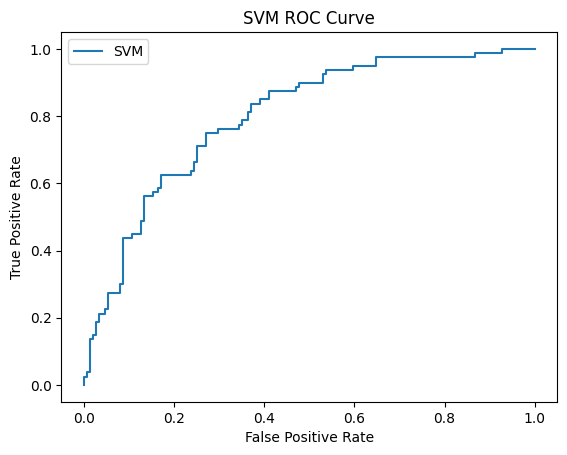

Support Vector Machines (SVM)
Confusion Matrix:
[[125  26]
 [ 33  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

ROC AUC Score: 0.7973509933774834


In [110]:
from sklearn.svm import SVC

# SVM modelini oluşturma
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred_svm = svm.predict(X_test)

# Konfüzyon Matrisi ve Classification Report
cm_svm = confusion_matrix(y_test, y_pred_svm)
cr_svm = classification_report(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()

# Özet Sonuçlar
print("Support Vector Machines (SVM)")
print("Confusion Matrix:")
print(cm_svm)
print("Classification Report:")
print(cr_svm)
print(f"ROC AUC Score: {roc_auc_svm}")

Karmaşıklık Matrisi (Confusion Matrix):
231 örneğin 125’i sınıf ‘0’ olarak doğru tahmin edildi (doğru negatifler).
26’sı sınıf ‘0’ olarak yanlış tahmin edildi (yanlış negatifler).
33’ü sınıf ‘1’ olarak yanlış tahmin edildi (yanlış pozitifler).
47’si sınıf ‘1’ olarak doğru tahmin edildi (doğru pozitifler).
Modelin sınıfları ne kadar iyi ayırt ettiğini gösterir.
Sınıflandırma Raporu (Classification Report):
Sınıf ‘0’ için hassasiyet (precision) sınıf '1’den daha yüksektir, bu da bir örneği sınıf ‘0’ olarak tahmin ettiğinde daha doğru olma eğiliminde olduğunu gösterir.
Sınıf ‘0’ için geri çağırma (recall) da yüksektir, yani tüm gerçek sınıf ‘0’ örneklerinin %83’ünü doğru bir şekilde tanımlar.
Sınıf ‘0’ için F1 puanı yaklaşık %81’dir, bu da bu sınıf için dengeli bir hassasiyet-geri çağırma ticaret-off’u gösterir.
Sınıf ‘1’ için hassasiyet ve geri çağırma sınıf ‘0’ kadar yüksek değildir. Bu, bu azınlık sınıfını tahmin ederken daha fazla yanlış pozitif veya yanlış negatif olabileceğini gösterebilir.
Makro ortalama ve ağırlıklı ortalama puanları sırasıyla %72 ve %74 civarındadır. Bu ortalama değerler her iki sınıfın performansını da dikkate alırken ağırlıklı ortalama, çoğunluk sınıfına daha fazla ağırlık verir.
Verilen ROC AUC Puanı yaklaşık 0.797, genel olarak modelin iyi bir ayrım yeteneğine sahip olduğunu gösterir; pozitif ve negatif sınıfları oldukça iyi ayırt edebilir.
Bu bilgiler, özellikle azınlık sınıfları tahmin etme konusunda iyileştirme alanı olsa da, SVM sınıflandırıcısının bu metriklere göre makul bir performans sergilediğini gösteriyor.

**Sonuçların Raporlanması**

Bu adımlarla elde edilen metrikleri gözlemleyip bir kanıya varmamız gerekirse genel olarak bakıldığında; SVM en yüksek ROC ve AUC puanına sahip, ayrıca sınıf 0'ı daha iyi tahmin ediyor gibi görünüyor.